80
80


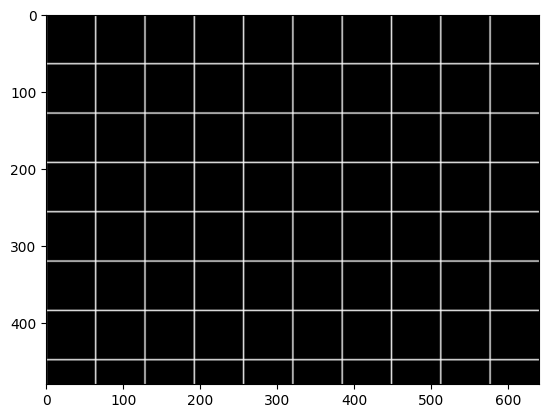

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

width = 640
height = 480
window = 64

image = np.zeros((height, width, 3), dtype=np.uint8)

l = int(np.ceil(width / window) * np.ceil(height / window))

print(l)

values = []

for i in range(l):
    x = (i % (width / window)) * window
    y = (i // (width / window)) * window
    values.append([x, y])

iter_vals = []

for x in range(0, width, window):
    for y in range(0, height, window):
        iter_vals.append([x, y])
        
values = np.array(values).astype(np.int32)
iter_vals = np.array(iter_vals).astype(np.int32)

# check if all values are the same
#print(np.all(values == iter_vals)

# sort values by index
values = values[np.lexsort((values[:, 1], values[:, 0]))]
iter_vals = iter_vals[np.lexsort((iter_vals[:, 1], iter_vals[:, 0]))]

print(len(values))

for pair in values:
    cv2.rectangle(image, (pair[0], pair[1]), (pair[0] + window, pair[1] + window), (255, 255, 255), 1, cv2.LINE_AA)

plt.imshow(image)
plt.show()

(0.645, 0.5925, 0.5066666666666667, 0.485)
(235, 140, 539, 334)
(400, 600, 3)
[235, 140, 539, 334]


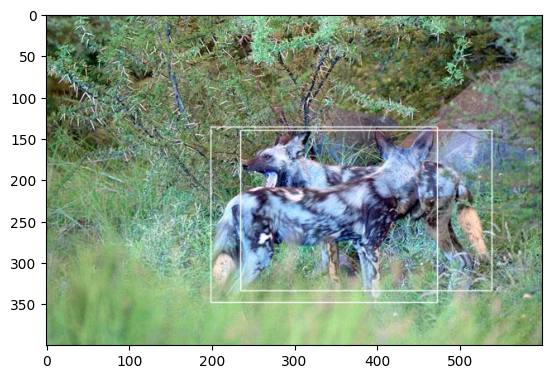

In [19]:
import os
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

image_path = "/home/jack/Mounts/DiskOne/doggy_cam/datasets/dog_objects/yolo/images/val/n02116738_9844.jpg"
label_path = "/home/jack/Mounts/DiskOne/doggy_cam/datasets/dog_objects/yolo/labels/val/n02116738_9844.txt"
coco_dir = '/home/jack/Mounts/DiskOne/doggy_cam/datasets/dog_objects/coco'

frame = cv2.imread(image_path)

def crop_to_frame(box, frame_shape):
    x1, y1, x2, y2 = box
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(frame_shape[1], x2)
    y2 = min(frame_shape[0], y2)
    return [x1, y1, x2, y2]


def coco_to_yolo(x1, y1, x2, y2, frame_shape):
    # convert xmin, ymin, xmax, ymax to normalized center pixel xc, xy, width, height
    xc = ((x1 + x2) / 2) / frame_shape[1]
    yc = ((y1 + y2) / 2) / frame_shape[0]
    width = (x2 - x1) / frame_shape[1]
    height = (y2 - y1) / frame_shape[0]
    
    return xc, yc, width, height

def yolo_to_coco(xc, yc, width, height, frame_shape):
    x1 = int((xc - width / 2) * frame_shape[1])
    x2 = int((xc + width / 2) * frame_shape[1])
    y1 = int((yc - height / 2) * frame_shape[0])
    y2 = int((yc + height / 2) * frame_shape[0])
    
    return x1, y1, x2, y2
    

with open(os.path.join(coco_dir, 'coco.json'), 'r') as f:
    coco_data = json.load(f)

images = coco_data['images']
annotations = coco_data['annotations']

image = next(filter(lambda x: x['file_name'] == os.path.basename(image_path), images))
annotation = next(filter(lambda x: x['image_id'] == image['id'], annotations))

box = [int(x) for x in annotation['bbox']]

box = [235, 140, 539, 334]

print(coco_to_yolo(*box, frame.shape))
print(yolo_to_coco(*coco_to_yolo(*box, frame.shape), frame.shape))

box = crop_to_frame(box, frame.shape)

# <xmin>235</xmin>
# <ymin>140</ymin>
# <xmax>539</xmax>
# <ymax>334</ymax>

print(frame.shape)
print(box)

cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (255, 255, 255), 1, cv2.LINE_AA)

box = [199, 136, 473, 348]

cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (255, 255, 255), 1, cv2.LINE_AA)

plt.imshow(frame)
plt.show()

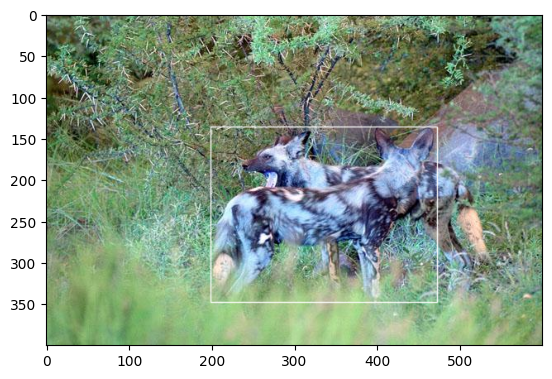

In [22]:
frame = cv2.imread(image_path)

with open(label_path, 'r') as f:
    lines = f.readlines()
    splits = [l.strip() for l in lines[0].split()]
    
xc, yc, w, h = [float(s) for s in splits[1:]]
#print(xc, yc, w, h)


x1, y1, x2, y2 = yolo_to_coco(xc, yc, w, h, frame.shape)

cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 255, 255), 1, cv2.LINE_AA)

plt.imshow(frame)
plt.show()